In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [3]:
# Load the dataset
df = pd.read_csv('stock_prices.xls')  

In [4]:
data = df['Close'].values.reshape(-1, 1)

In [5]:
# Normalize the data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

In [6]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [7]:
sequence_length = 20
X, y = create_sequences(data_normalized, sequence_length)

In [8]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [9]:
model = Sequential([
    SimpleRNN(units=50, input_shape=(X.shape[1], X.shape[2]), activation='relu'),
    Dense(units=1)
])

In [10]:
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/50
14/14 [==============================] - 2s 32ms/step - loss: 0.3234 - val_loss: 0.4021
Epoch 2/50
14/14 [==============================] - 0s 5ms/step - loss: 0.1255 - val_loss: 0.0561
Epoch 3/50
14/14 [==============================] - 0s 4ms/step - loss: 0.0095 - val_loss: 0.0039
Epoch 4/50
14/14 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 5/50
14/14 [==============================] - 0s 5ms/step - loss: 6.2568e-04 - val_loss: 0.0016
Epoch 6/50
14/14 [==============================] - 0s 5ms/step - loss: 4.2132e-04 - val_loss: 0.0015
Epoch 7/50
14/14 [==============================] - 0s 6ms/step - loss: 3.8795e-04 - val_loss: 0.0015
Epoch 8/50
14/14 [==============================] - 0s 5ms/step - loss: 4.0159e-04 - val_loss: 0.0016
Epoch 9/50
14/14 [==============================] - 0s 6ms/step - loss: 4.0510e-04 - val_loss: 0.0015
Epoch 10/50
14/14 [==============================] - 0s 6ms/step - loss: 3.8899e-04 - val_loss: 0

In [11]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


In [12]:
y_train_pred_actual = scaler.inverse_transform(y_train_pred)
y_test_pred_actual = scaler.inverse_transform(y_test_pred)

In [13]:
from sklearn.metrics import mean_squared_error
train_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(y_train), y_train_pred_actual))
test_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test), y_test_pred_actual))

In [14]:
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train RMSE: 1.9524
Test RMSE: 2.9030


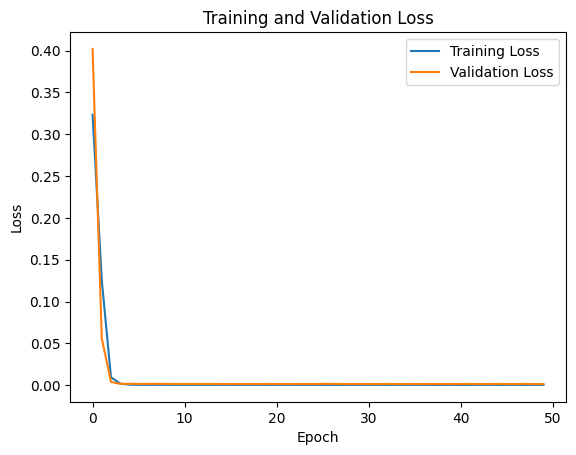

In [15]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Train Loss: {train_loss:.4f}')
print(f'Test Loss: {test_loss:.4f}')

Train Loss: 0.0004
Test Loss: 0.0009


In [17]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Inverse transform the predictions to get actual prices
y_train_pred_actual = scaler.inverse_transform(y_train_pred)
y_test_pred_actual = scaler.inverse_transform(y_test_pred)

4/4 [==============================] - 0s 4ms/step


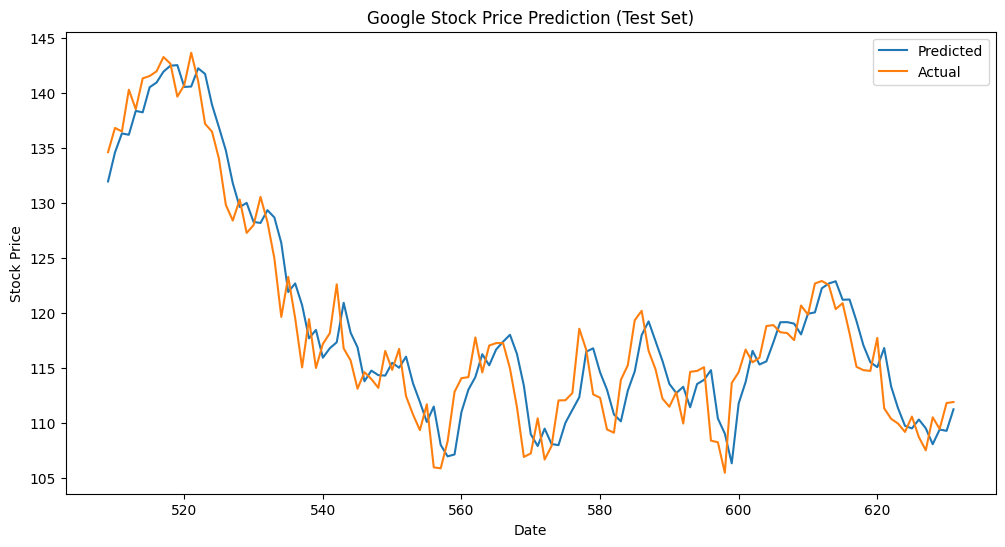

In [18]:
# Plot predictions vs actual values for the test set
plt.figure(figsize=(12, 6))
plt.plot(df.index[split+sequence_length:], y_test_pred_actual, label='Predicted')
plt.plot(df.index[split+sequence_length:], scaler.inverse_transform(y_test), label='Actual')
plt.title('Google Stock Price Prediction (Test Set)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()